# Web Scraping using Beautiful Soup and Selenium for dynamic page

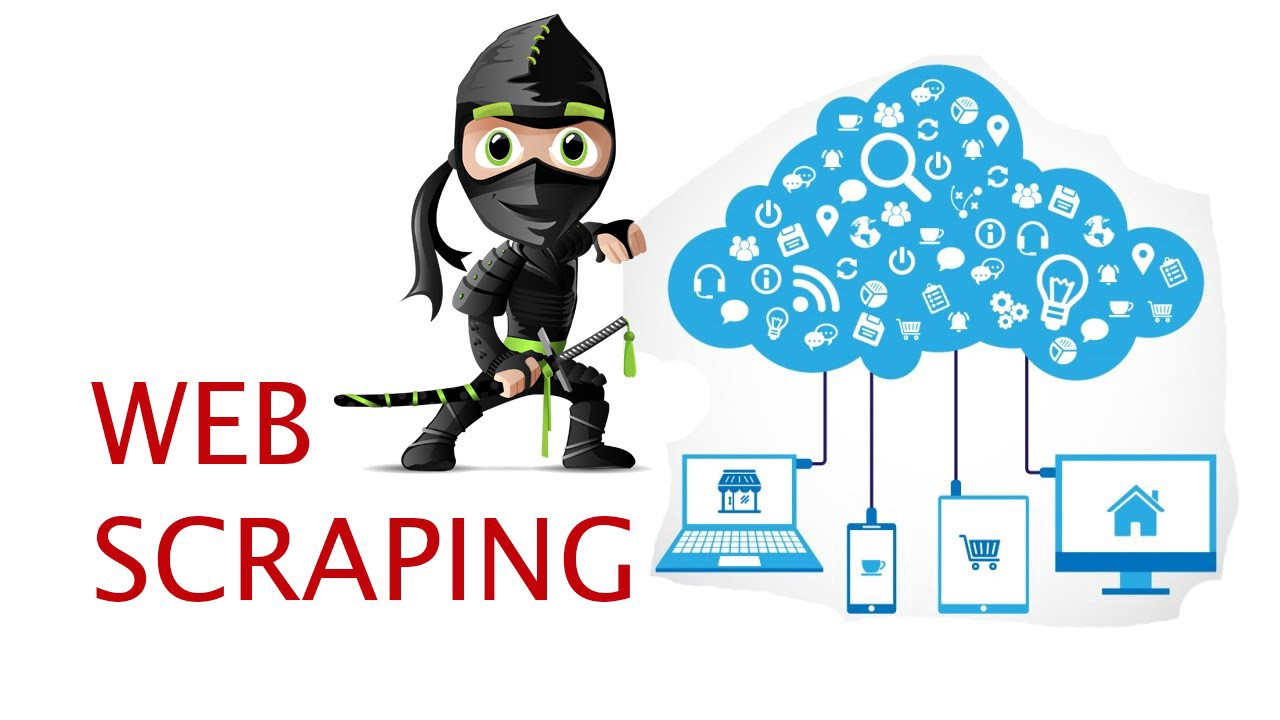

# Why Selenium? Isn’t Beautiful Soup enough?

**Web scraping with Python often requires no more than the use of the Beautiful Soup to reach the goal. Beautiful Soup is a very powerful library that makes web scraping by traversing the DOM (document object model) easier to implement. But it does only static scraping. Static scraping ignores JavaScript. It fetches web pages from the server without the help of a browser. You get exactly what you see in “view page source”, and then you slice and dice it. If the data you are looking for is available in “view page source” only, you don’t need to go any further. But if you need data that are present in components which get rendered on clicking JavaScript links, dynamic scraping comes to the rescue. The combination of Beautiful Soup and Selenium will do the job of dynamic scraping. Selenium automates web browser interaction from python. Hence the data rendered by JavaScript links can be made available by automating the button clicks with Selenium and then can be extracted by Beautiful Soup.**

In [1]:
import csv
from parsel import Selector
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [2]:
import os,random,sys,time
from urllib.parse import urlparse
from bs4 import BeautifulSoup

In [3]:
writer = csv.writer(open('output.csv', 'w+', encoding='utf-8-sig', newline=''))
writer.writerow(['name', 'loc', 'profile_title', 'connection', 'job_title', 'company_name', 'joining_date', 'exp', 'degree_name', 'stream', 'degree_year'])

106

In [4]:
driver=webdriver.Chrome('C:/Users/DELL/Desktop/DATA SCIENCE PROJECTS(BY SAJIB)/6..END TO END NLP-TEXT PREPROCESSING WITH SPACY/driver/chromedriver.exe')
driver.get('https://www.linkedin.com/uas/login')

In [5]:
file=open('config.txt')
lines=file.readlines()
username=lines[0]
password=lines[1]

In [6]:
elementID=driver.find_element_by_id("username")
elementID.send_keys(username)

In [7]:
elementID=driver.find_element_by_id("password")
elementID.send_keys(password)

In [8]:
elementID.submit()

In [10]:
link = 'https://www.linkedin.com/in/rishabh-singh-61b706114/'
driver.get(link)

- The whole profile doesn’t get loaded at the start. Only the part which we can see is loaded. So we will have to scroll the profile till the end so that the complete profile is loaded. The code given below scrolls the profile till the end.

In [12]:
SCROLL_PAUSE_TIME = 5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

for i in range(3):
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [14]:
src = driver.page_source
soup = BeautifulSoup(src, 'lxml')

In [15]:
name_div = soup.find('div', {'class': 'flex-1 mr5'})
name_div

<div class="flex-1 mr5">
<ul class="pv-top-card--list inline-flex align-items-center">
<li class="inline t-24 t-black t-normal break-words">
              Rishabh Singh
            </li>
<li class="pv-top-card__distance-badge inline-block v-align-text-bottom t-16 t-black--light t-normal"><span class="distance-badge separator">
<span class="visually-hidden">2nd degree connection</span><span aria-hidden="true" class="dist-value">2nd</span>
</span></li>
<!-- --> <li class="inline-flex ml2">
<span class="pv-member-badge--for-top-card inline-flex pv-member-badge ember-view" id="ember64" style="display: none;"><!-- -->
<!-- -->
<span class="visually-hidden">
  Rishabh has a  account
</span>
<!-- --></span>
</li>
<!-- --> </ul>
<h2 class="mt1 t-18 t-black t-normal break-words">
              #futureshaper
            </h2>
<ul class="pv-top-card--list pv-top-card--list-bullet mt1">
<li class="t-16 t-black t-normal inline-block">
                Bangalore Urban, Karnataka, India
              

In [16]:
name_loc = name_div.find_all('ul')
name = name_loc[0].find('li').get_text().strip()
name

'Rishabh Singh'

In [17]:
loc = name_loc[1].find('li').get_text().strip()
loc

'Bangalore Urban, Karnataka, India'

In [18]:
profile_title = name_div.find('h2').get_text().strip()
profile_title

'#futureshaper'

In [19]:
connection = name_loc[1].find_all('li')
connection = connection[1].get_text().strip()
connection

'500+ connections'

In [20]:
info = []
info.append(link)
info.append(name)
info.append(profile_title)
info.append(loc)
info.append(connection)
info

['https://www.linkedin.com/in/rishabh-singh-61b706114/',
 'Rishabh Singh',
 '#futureshaper',
 'Bangalore Urban, Karnataka, India',
 '500+ connections']

# Experience

In [21]:
exp_section = soup.find('section', {'id': 'experience-section'})
exp_section

<section class="pv-profile-section experience-section ember-view" id="experience-section"><header class="pv-profile-section__card-header">
<h2 class="pv-profile-section__card-heading">
    Experience
  </h2>
<!-- --></header>
<ul class="pv-profile-section__section-info section-info pv-profile-section__section-info--has-no-more">
<li class="pv-entity__position-group-pager pv-profile-section__list-item ember-view" id="ember144"> <section class="pv-profile-section__card-item-v2 pv-profile-section pv-position-entity ember-view" id="1517647779"> <div class="display-flex justify-space-between full-width">
<div class="display-flex flex-column full-width">
<a class="full-width ember-view" data-control-name="background_details_company" href="/company/honeywell/" id="ember146"> <div class="pv-entity__logo company-logo">
<img alt="Honeywell" class="pv-entity__logo-img EntityPhoto-square-5 lazy-image ember-view" id="ember148" loading="lazy" src="https://media-exp1.licdn.com/dms/image/C560BAQFvcIh3

In [22]:
exp_section = exp_section.find('ul')
div_tag = exp_section.find('div')
a_tag = div_tag.find('a')
a_tag

<a class="full-width ember-view" data-control-name="background_details_company" href="/company/honeywell/" id="ember146"> <div class="pv-entity__logo company-logo">
<img alt="Honeywell" class="pv-entity__logo-img EntityPhoto-square-5 lazy-image ember-view" id="ember148" loading="lazy" src="https://media-exp1.licdn.com/dms/image/C560BAQFvcIh3UnA5zw/company-logo_100_100/0/1535662846602?e=1616630400&amp;v=beta&amp;t=Br8j_CzZtUW_T6Nnuql5R86XMdfgjQxI5IWyKf7alus"/>
</div>
<div class="pv-entity__summary-info pv-entity__summary-info--background-section ">
<h3 class="t-16 t-black t-bold">FPGA Engineer</h3>
<p class="visually-hidden">Company Name</p>
<p class="pv-entity__secondary-title t-14 t-black t-normal">
      Honeywell
<!-- --> </p>
<div class="display-flex">
<h4 class="pv-entity__date-range t-14 t-black--light t-normal">
<span class="visually-hidden">Dates Employed</span>
<span>Aug 2019 – Present</span>
</h4>
<h4 class="t-14 t-black--light t-normal">
<span class="visually-hidden">Employm

In [23]:
job_title = a_tag.find('h3').get_text().strip()
job_title

'FPGA Engineer'

In [24]:
company_name = a_tag.find_all('p')[1].get_text().strip()
company_name

'Honeywell'

In [25]:
joining_date = a_tag.find_all('h4')[0].find_all('span')[1].get_text().strip()
joining_date

'Aug 2019 – Present'

In [26]:
exp = a_tag.find_all('h4')[1].find_all('span')[1].get_text().strip()
exp

'1 yr 5 mos'

In [27]:
info.append(company_name)
info.append(job_title)
info.append(joining_date)
info.append(exp)
info

['https://www.linkedin.com/in/rishabh-singh-61b706114/',
 'Rishabh Singh',
 '#futureshaper',
 'Bangalore Urban, Karnataka, India',
 '500+ connections',
 'Honeywell',
 'FPGA Engineer',
 'Aug 2019 – Present',
 '1 yr 5 mos']

# Education

In [28]:
edu_section = soup.find('section', {'id': 'education-section'}).find('ul')
edu_section

<ul class="pv-profile-section__section-info section-info pv-profile-section__section-info--has-no-more">
<li class="pv-profile-section__list-item pv-education-entity pv-profile-section__card-item ember-view" id="356637700"><div class="display-flex justify-space-between full-width">
<div class="display-flex flex-column full-width">
<a class="ember-view" data-control-name="background_details_school" href="/school/223389/?legacySchoolId=223389" id="ember161"> <div class="pv-entity__logo">
<img alt="Technocrats Institute of Technology (Excellence), Anand Nagar, PB No. 24, Post Piplani, BHEL, Bhopal - 462021" class="pv-entity__logo-img pv-entity__logo-img EntityPhoto-square-4 lazy-image ghost-school ember-view" id="ember163" loading="lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7"/>
</div>
<div class="pv-entity__summary-info pv-entity__summary-info--background-section">
<div class="pv-entity__degree-info">
<h3 class="pv-entity__school-name t-16 t-b

In [29]:
college_name = edu_section.find('h3').get_text().strip()
college_name

'Technocrats Institute of Technology (Excellence), Anand Nagar, PB No. 24, Post Piplani, BHEL, Bhopal - 462021'

In [30]:
degree_name = edu_section.find('p', {'class': 'pv-entity__secondary-title pv-entity__degree-name t-14 t-black t-normal'}).find_all('span')[1].get_text().strip()
degree_name

'Bachelor of Engineering (B.E.)'

In [31]:
stream = edu_section.find('p', {'class': 'pv-entity__secondary-title pv-entity__fos t-14 t-black t-normal'}).find_all('span')[1].get_text().strip()
stream

'Electrical, Electronics and Communications Engineering'

In [32]:
degree_year = edu_section.find('p', {'class': 'pv-entity__dates t-14 t-black--light t-normal'}).find_all('span')[1].get_text().strip()
degree_year

'2012 – 2016'

In [33]:
info.append(college_name)
info.append(degree_name)
info.append(stream)
info.append(degree_year)
info

['https://www.linkedin.com/in/rishabh-singh-61b706114/',
 'Rishabh Singh',
 '#futureshaper',
 'Bangalore Urban, Karnataka, India',
 '500+ connections',
 'Honeywell',
 'FPGA Engineer',
 'Aug 2019 – Present',
 '1 yr 5 mos',
 'Technocrats Institute of Technology (Excellence), Anand Nagar, PB No. 24, Post Piplani, BHEL, Bhopal - 462021',
 'Bachelor of Engineering (B.E.)',
 'Electrical, Electronics and Communications Engineering',
 '2012 – 2016']

In [34]:
writer.writerow(['name', 'loc', 'profile_title', 'connection', 'job_title', 'company_name', 'joining_date', 'exp', 'degree_name', 'stream', 'degree_year'])

106

In [35]:
driver.quit()

#### This is simply we do Web Scrapping-- 👍